coefficient of determination : 
0.8913639162714652


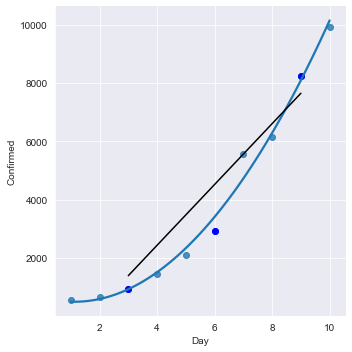

coefficient of determination : 
0.8148668866744749


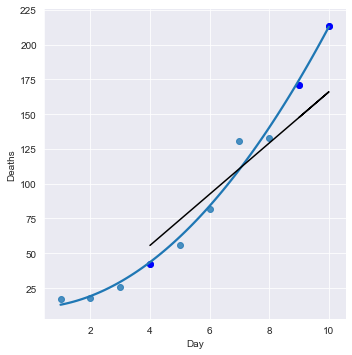

AGE - DEATH
Intercept    2.040639e-77
deceaed      9.418043e-52
dtype: float64
AGE - CONFIRMED
Intercept    1.569785e-48
confirmed    4.866793e-01
dtype: float64
SEX - DEATH
Intercept    0.006303
deceased     0.240457
dtype: float64
SEX - CONFIRMED
Intercept    2.879818e-21
confirmed    1.770339e-15
dtype: float64
coefficient of determination : 
-0.02355464984014199


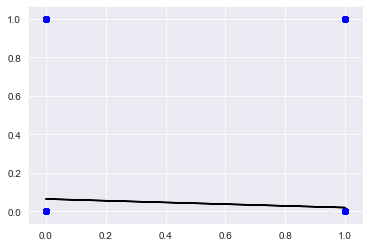

coefficient of determination : 
0.012095640715362177


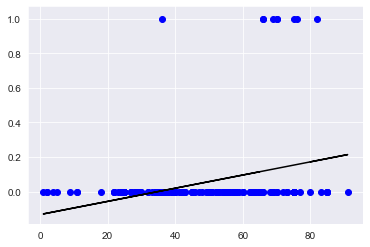

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm 
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#importing Dataset
df_stats = pd.read_csv('covid_19_data.csv',index_col='Last Update', parse_dates=['Last Update'])
df_age = pd.read_csv('time_age.csv')
df_sex = pd.read_csv('time_gender.csv')
df_sex_age = pd.read_csv('age_sex_deaths.csv')


df_confirmed = df_stats.groupby(['ObservationDate']).sum()

#Adding the Index column

df_confirmed ['Day'] = np.arange(len(df_confirmed))+1

df_confirmed = df_confirmed[['Day', 'Confirmed']] 

df_confirmed = df_confirmed.head(10)

sns.lmplot(x ="Day", y ="Confirmed", data = df_confirmed, order = 2, ci = None) 

# Eliminating NaN or missing input numbers 
df_confirmed.fillna(method ='ffill', inplace = True) 
 
Xc = np.array(df_confirmed['Day']).reshape(-1, 1) 
yc = np.array(df_confirmed['Confirmed']).reshape(-1, 1) 

# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_confirmed.dropna(inplace = True) 

# Dropping any rows with Nan values 
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.25) 
 
# Splitting the data into training and testing data 
regrc = LinearRegression() 
regrc.fit(Xc_train, yc_train) 

# coefficient of determination : 
print('coefficient of determination : ')
print(regrc.score(Xc_test, yc_test)) 
yc_pred = regrc.predict(Xc_test)
plt.scatter(Xc_test, yc_test, color ='b') 
plt.plot(Xc_test, yc_pred, color ='k') 
plt.show() 

# ---------------------------------------------------------------------------------------

df_deaths = df_stats.groupby(['ObservationDate']).sum()
df_deaths ['Day'] = np.arange(len(df_deaths))+1
df_deaths = df_deaths[['Day', 'Deaths']] 
df_deaths = df_deaths.head(10)
sns.lmplot(x ="Day", y ="Deaths", data = df_deaths, order = 2, ci = None) 
df_deaths.fillna(method ='ffill', inplace = True)
Xd = np.array(df_deaths['Day']).reshape(-1, 1) 
yd = np.array(df_deaths['Deaths']).reshape(-1, 1) 
df_deaths.dropna(inplace = True)

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.25)

regrd = LinearRegression()
regrd.fit(Xd_train, yd_train) 


print('coefficient of determination : ')
print(regrd.score(Xd_test, yd_test)) 

yd_pred = regrd.predict(Xd_test)

plt.scatter(Xd_test, yd_test, color ='b') 
plt.plot(Xd_test, yd_pred, color ='k')


plt.show() 
print("AGE - DEATH")
lm1 = smf.ols(formula='age ~ deceaed', data=df_age).fit()
print(lm1.pvalues)

print("AGE - CONFIRMED")
lm2 = smf.ols(formula='age ~ confirmed', data=df_age).fit()
print(lm2.pvalues)

print("SEX - DEATH")
lm1 = smf.ols(formula='sex ~ deceased', data=df_sex).fit()
print(lm1.pvalues)

print("SEX - CONFIRMED")
lm2 = smf.ols(formula='sex ~ confirmed', data=df_sex).fit()
print(lm2.pvalues)

# -------death gender prediction----------------------------------------------------------------------

X = np.array(df_sex_age['gender'] ).reshape(-1, 1) 
y = np.array(df_sex_age['death']).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train) 

print('coefficient of determination : ')
print(regr.score(X_test, y_test)) 

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k')


plt.show() 

#------death Age prediction-----------------------------------

X = np.array(df_sex_age['age'] ).reshape(-1, 1) 
y = np.array(df_sex_age['death']).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train) 

print('coefficient of determination : ')
print(regr.score(X_test, y_test)) 

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k')


plt.show() 










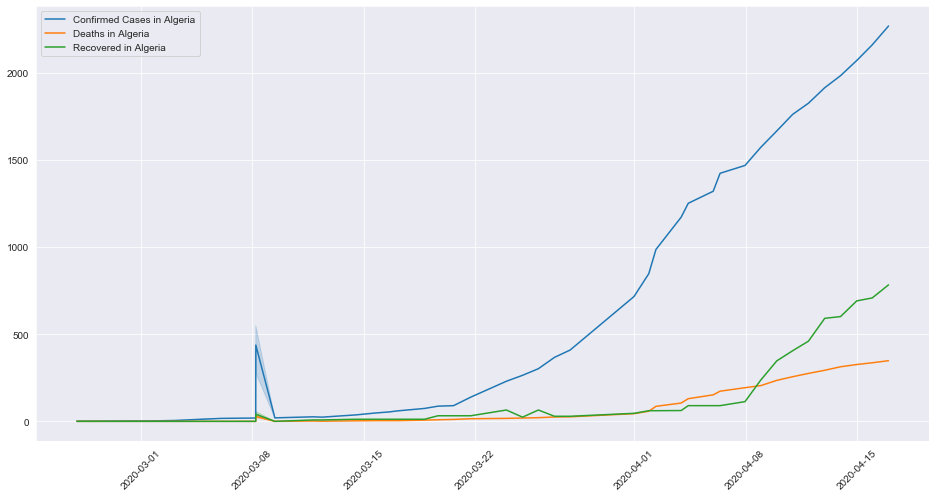

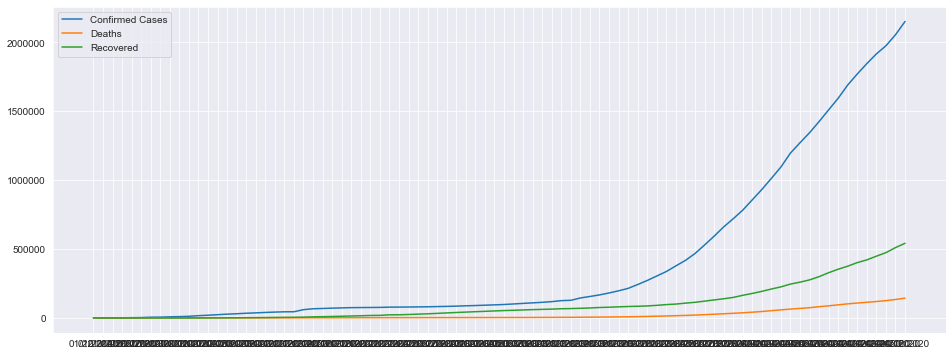

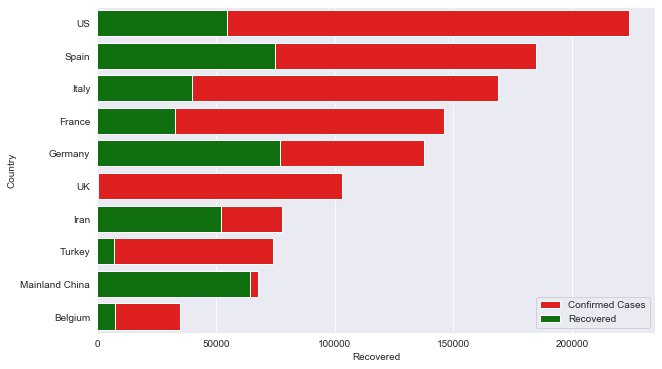

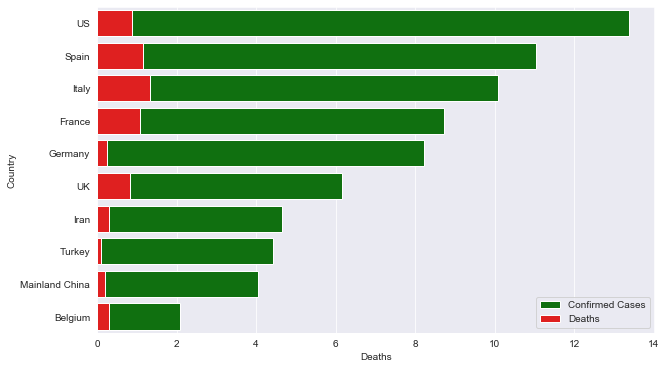

In [10]:
#------ Statistics in Algeria-----------------------------------

df_algeria= df_stats[df_stats['Country/Region']=='Algeria']

plt.figure(figsize = (16,8))
sns.set_style("darkgrid")
g = sns.lineplot(data =df_algeria['Confirmed'], label = "Confirmed Cases in Algeria")
sns.lineplot(data =df_algeria['Deaths'], label = "Deaths in Algeria")
sns.lineplot(data = df_algeria['Recovered'], label = "Recovered in Algeria")
plt.xticks(rotation=45)
plt.show()

#------ Statistics in the world-----------------------------------

df_stats_recent = df_stats.groupby(['ObservationDate']).sum()


plt.figure(figsize = (16,6))
sns.set_style("darkgrid")
g = sns.lineplot(data =df_stats_recent['Confirmed'], label = "Confirmed Cases In the world")
sns.lineplot(data =df_stats_recent['Deaths'], label = "Deaths In the world")
sns.lineplot(data = df_stats_recent['Recovered'], label = "Recovered In the world")
plt.show()

#------Death Statistics in the world-----------------------------------

country_conf_max = []
country_reco_max = []
country_deth_max = []
country_val = []
for country, subset in df_stats.groupby('Country/Region'):
    country_conf_max.append(max(subset['Confirmed']))
    country_reco_max.append(max(subset['Recovered'])) 
    country_deth_max.append(max(subset['Deaths']))
    country_val.append(country)
df_country_woc = pd.DataFrame({"Country": country_val, "Confirmed":country_conf_max, "Recovered": country_reco_max, "Death": country_deth_max})
df_woc = df_country_woc.sort_values('Confirmed', ascending = False)
df_woc_top10 = df_woc.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y= 'Country', data = df_woc_top10, color='r', label='Confirmed Cases')
sns.barplot(x='Recovered', y= 'Country', data = df_woc_top10, color='g', label='Recovered')
plt.legend()
plt.show()


#------tendance of confirmed and death cases in the world-----------------------------------

country_conf_max = []
country_reco_max = []
country_deth_max = []
country_val = [] 
total_confirmed=0

for country, subset in df_stats.groupby('Country/Region'):
    total_confirmed += max(subset['Confirmed'])
    
#------percantage of confirmed and death cases in the world-----------------------------------
                          
for country, subset in df_stats.groupby('Country/Region'):                           
    country_conf_max.append(max(subset['Confirmed'])/total_confirmed*100) 
    country_deth_max.append(max(subset['Deaths']) / total_confirmed*100 )
    country_val.append(country)
                           
                         
df_country_woc = pd.DataFrame({"Country": country_val, "Confirmed":country_conf_max, "Deaths": country_deth_max, "Death": country_deth_max})
df_woc = df_country_woc.sort_values('Confirmed', ascending = False)
df_woc_top10 = df_woc.head(10)
#-----------------------------------------Plots ----------------------------------------------

plt.figure(figsize=(10,6))
sns.barplot(x='Confirmed', y= 'Country', data = df_woc_top10, color='g', label='Confirmed Cases')
sns.barplot(x='Deaths', y= 'Country', data = df_woc_top10, color='r', label='Deaths')
plt.legend()
plt.show()
